<a href="https://colab.research.google.com/github/ShoSato-047/R_review/blob/main/STAT380_2_2_(2025)_Probability_models_for_Y_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: where are we headed?

Consider the following variables:

*  Presence/absence of CHD (a binary random variable)
*  Number of homeless individuals per 100,000 population (a count random variable)

To model variables like this, standard regression methods are not appropriate, as these variables do not follow a continuous, bell-shaped *conditional* distribution like those most frequently encountered in STAT 360.  To model these appropriately, we need to consider their *probability distribution*.  In the next series of notebooks, we will consider various *probability models* for an outcome $Y$.




# What is a probability model?


*Probability models* are mathematical functions that model the probability of observing certain values of random variables.  These functions depend on one or more *parameters*, quantities that control the probability of outcomes occurring.

Probability models for ***discrete*** random variables are often expressed like:

$$P(Y = k) = ...$$

read as "the probability that the random variable $Y$ takes on the value $k$."

Probability models for ***continuous*** random variables are often expressed like:

$$f_Y(k)=...$$

read as "the density of the the random variable $Y$ at the value $k$."

Probability models represent the likelihood of certain outcomes using point masses (for discrete random variables) or smooth curves (for continuous random variables):
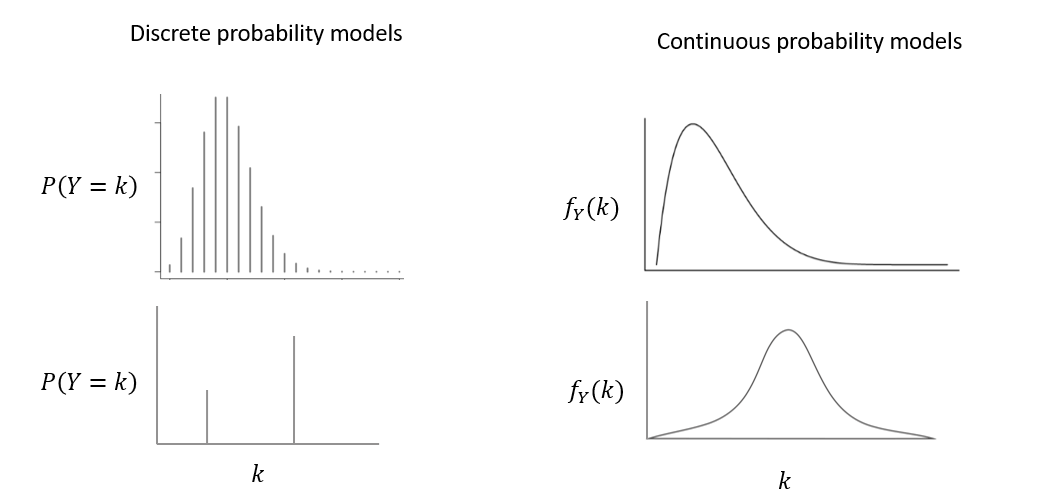

## Parameters

All probability models are governed by *parameters*: entities that govern all the properties of the distribution, including:

* Probabilities;
* Means;
* Variances;
* Shapes (skewness, etc.)


# The binomial model

Consider the following random variables, $Y$:


* $Y$ represents the number of correct answers out of 30 true/false questions.
* $Y$ represents the number of winning lottery tickets out of 10 of the same kind.
* $Y$ represents the number of left-handers in a randomly selected sample of 100 unrelated people.

Notice the commonalities between these random variables:

* Each $Y$ counts the number of "successes" out of fixed $n$ number of trials
* Each trial has one of two possible outcomes: "success/1" or "failure/0"
* The $n$ trials are independent
* The probability of "success" on each trial is the same

The Binomial probability function models data that involve a sample of $n$ independent binary (also called Bernoulli) outcomes.  It depends on two ***parameters***: $n$, the sample size; and $p$, the probability that a "1" occurs.

* Binomial random variables, $Y$, measure the number of 1's (or successes) out of $n$ independent Bernoulli trials.
* When $Y$ follow a binomial model, we say $Y\sim BIN(n,p).$
  - These parameters $n$ and $p$ tell us everything there is to know about the Binomial model.
* $Y\sim BIN(n = 1,p)$ is a Bernoulli (0/1) random variable, representing the number of "successes" out of $n=1$ trials.

# Using the binomial to do one-parmeter testing
Let's first apply the binomial to develop some simple one-parameter testing, a la STAT 210.  


* Suppose an investigator notices that children develop chronic bronchitis in the first year of life in 3 of 20 households in which both parents have chronic bronchitis (3/20 = 15%).
* The national incidence rate of bronchitis is 5%
* Is this difference “real”, or can it be attributed to chance?  



The data:

Obs ID | Brochitis? |
--- | --- |
1 | Yes
2 |No
3 |No
4 |No
5 |No
6 |Yes
7 |No
8 |Yes
9 |No
10 |No
11 |No
12 |No
13 |No
14 |No
15 |No
16 |No
17 |No
18 |No
19 |No
20 |No



In [3]:
# Do not include number when you defin Y

* How would we define the random variable of interest, $Y$?  
    - **The number of households where the child develops CB.**
* For this problem we are interested in finding $P(Y\geq 3)$, assuming that the likelihood any household where 2 parents have CB is 5%.  What does "$P(Y\geq 3)$" mean?
  - **Probability of 3 or more households out of 20 having the child developping CB.**
* Does $Y$ have the characteristics of a binomial random variable?  

## A simulation

* What if the difference is not "real"?
* What outcomes would we expect?
* Setting up a simulation study under the assumption that the rate of chronic bronchitis is 5% among households where both parents have it; here `rbinom()` simulates many realizations of $BIN(20,0.05)$ random variables (more on this later):


In [4]:
set.seed(182)
many.Y.realizations <- rbinom(10000, 20, 0.05) #20 = number of households
head(many.Y.realizations)

[1] 4 1 1 0 1 0

* Explain what each of the above numbers mean.

In [5]:
# The 4 means that in the first smple, 4/20 households had the kid developping CB.
# The 1 means that in the second smple, 1/20 households had the kid developping CB.

Now we want to tabulate the frequency with which each possible outcome occurred:

In [6]:
# Tabulating:
(count.results <- xtabs(~many.Y.realizations))

many.Y.realizations
   0    1    2    3    4    5    6    8 
3641 3765 1829  603  144   12    5    1 

* The number under $3$ is $603$.  What does this number mean?

In [7]:
#Turning the counts into proportions:
prop.table(count.results)

many.Y.realizations
     0      1      2      3      4      5      6      8 
0.3641 0.3765 0.1829 0.0603 0.0144 0.0012 0.0005 0.0001 

From the simulated output above;

* What is $\hat P(Y = 3)$? **6.03%**(Note that there is a "hat" over $P$ because this is an *estimated* probability, estimated via simulation.)
* What is $\hat P(Y\geq 3)$?  **6.03% + 1.44 + 0.12 + 0.05% + 0.01%**
* What does this simulation study illustrate about what we mean when we say "the probability that $Y$ is $k$ is $x\%$"?

If we plot the simulated outcomes in a bar graph, we are plotting the *simulated probability model*:

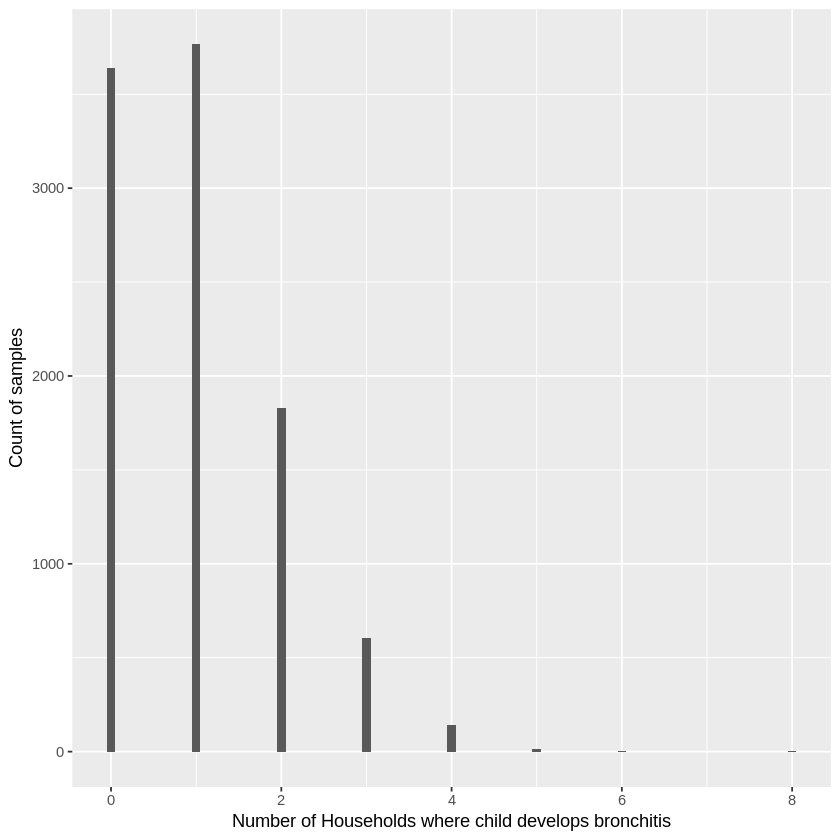

In [8]:
library(ggplot2)
ggplot() + geom_bar(aes(x = many.Y.realizations), width = .1) +
  ylab('Count of samples') +
  xlab('Number of Households where child develops bronchitis')

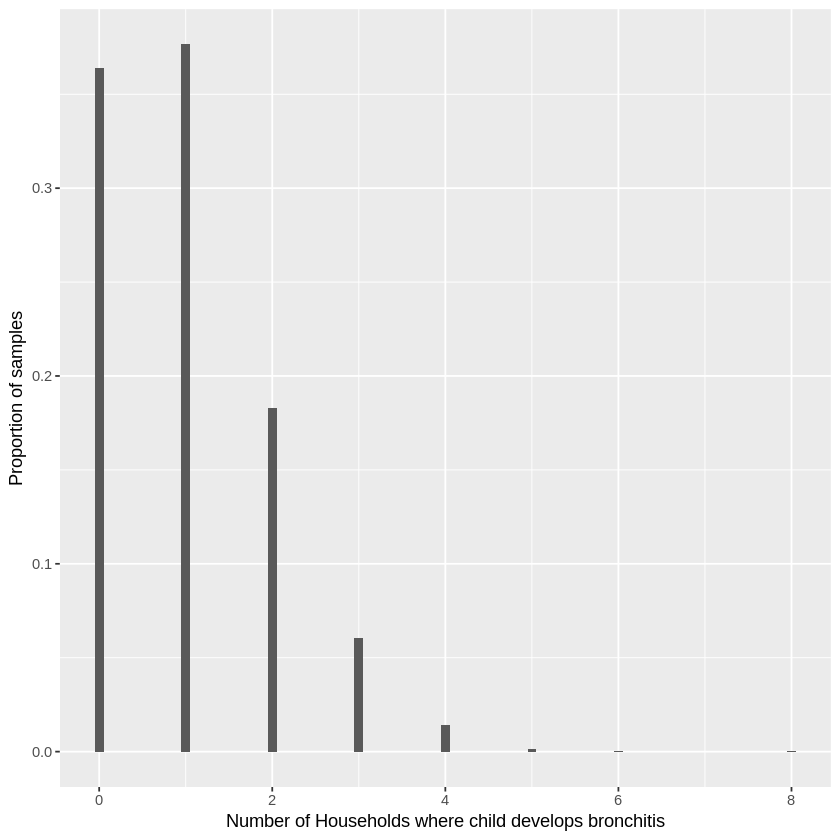

In [9]:
ggplot() +
  geom_bar(aes(x = many.Y.realizations, y  = after_stat(count)/10000), width = 0.1) +
  ylab('Proportion of samples') +
  xlab('Number of Households where child develops bronchitis')

Next we need to find the percent of samples of 20 households where 3 or more households see the child develop chronic bronchitis in the first year of life:

In [40]:
many.Y.realizations #>=3

[1] 4 1 1 0 1 0 1 0 2 2 2 1 3 0 1 1 2 1 1 2 2 0 1 0 1 0 0 2 0 0 1 0 0 2 0 2
   [37] 1 1 0 1 1 1 1 1 2 2 2 1 1 1 0 0 1 0 2 0 1 0 1 0 0 2 2 0 0 2 0 2 2 2 2 0
   [73] 2 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 2 0 1 1 0 0 2 0 0 0 0 2 4 1 1 1 1 0 0 1
  [109] 2 3 1 0 1 0 2 1 1 2 1 2 1 1 1 1 2 0 0 1 1 0 0 1 1 1 0 0 3 2 2 0 0 2 1 1
  [145] 1 1 0 0 0 0 1 1 1 2 0 0 0 1 2 0 0 3 0 2 1 0 1 3 0 2 1 3 2 1 0 2 1 0 1 0
  [181] 1 2 1 2 2 0 1 0 2 0 0 1 2 0 0 0 0 0 2 0 1 1 3 1 0 2 0 1 2 1 0 0 0 1 1 2
  [217] 2 1 2 2 0 0 4 1 0 0 0 1 0 1 1 2 2 1 1 2 2 4 2 2 0 0 0 1 1 1 0 2 0 2 0 0
  [253] 0 1 2 1 2 2 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 2 0 0 0 2 0 0 0 2 3
  [289] 0 0 1 1 3 4 0 1 1 0 1 3 0 0 1 1 2 1 0 0 1 1 4 0 1 1 2 0 1 1 0 0 1 1 0 2
  [325] 0 0 0 1 1 1 1 1 2 3 0 1 1 1 2 1 2 1 0 2 0 1 2 1 1 2 0 1 2 0 2 3 1 0 1 0
  [361] 1 2 3 0 1 1 2 1 2 1 0 1 3 0 0 1 1 2 2 1 0 1 4 1 0 0 1 1 2 2 2 0 0 0 0 3
  [397] 1 1 1 1 0 1 0 0 3 1 1 0 0 0 1 1 1 0 2 2 2 3 0 2 0 1 2 0 0 1 0 0 2 0 0 1
  [433] 0 1 1 1 1 1 0 3 1 4 1 0 0 1 0 0 2 0 0 2 1 1 0 3 0 2 2 1 2 0 1 1 1 1 2 0
  [469] 1 0 2 0 2 2 1 0 1 1 1 0 3 0 2 0 4 2 1 1 2 0 1 1 0 1 2 1 1 0 0 0 1 2 1 3
  [505] 1 1 0 2 2 1 0 1 1 1 1 3 2 2 1 1 0 1 3 2 0 3 0 1 1 2 2 1 0 1 0 2 0 1 1 0
  [541] 1 1 4 0 0 1 0 0 1 0 1 0 0 1 2 1 1 1 0 1 0 1 0 1 0 0 2 1 4 3 2 1 1 0 0 1
  [577] 1 1 2 0 1 1 0 1 1 1 3 0 1 1 1 1 0 1 1 4 1 0 0 1 2 0 0 4 1 1 2 1 0 3 1 0
  [613] 1 0 1 0 1 0 0 2 1 0 3 2 2 1 0 3 3 2 0 0 2 0 2 2 1 0 0 1 1 2 0 1 1 1 0 2
  [649] 1 2 3 2 0 3 1 1 3 2 0 0 2 1 0 1 1 0 1 0 1 2 0 1 1 2 0 2 0 0 0 1 0 2 0 1
  [685] 3 0 4 2 2 1 0 0 1 1 1 3 1 0 1 1 1 0 1 0 1 0 1 1 0 1 4 0 0 2 0 1 0 0 0 0
  [721] 2 0 2 1 1 2 2 1 0 2 2 1 0 1 1 2 1 1 1 2 3 0 2 2 0 1 3 1 1 1 1 0 3 0 1 0
  [757] 1 0 0 0 1 1 0 2 2 0 1 0 1 3 1 0 0 0 1 0 1 0 0 1 3 0 0 2 2 1 3 0 1 0 0 1
  [793] 1 1 2 0 0 2 0 0 0 3 1 0 2 0 2 2 2 1 3 3 0 1 0 0 4 0 2 1 2 0 2 0 0 3 0 0
  [829] 3 1 0 1 3 0 1 1 1 1 0 3 1 0 0 0 4 0 0 0 4 1 0 2 0 3 2 2 0 1 1 0 1 1 0 2
  [865] 1 0 0 3 0 1 2 0 1 0 3 3 2 0 1 0 0 2 2 1 1 0 1 1 2 1 0 1 0 0 2 0 2 2 0 0
  [901] 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 2 0 1 0 1 0 1 0 0 2 1 1 1 0 0 3 2 1 2 0
  [937] 0 1 0 1 2 1 1 0 2 0 2 3 0 0 0 1 2 1 0 2 1 4 2 1 1 0 1 1 0 0 1 0 0 0 0 0
  [973] 2 1 0 0 0 1 0 0 3 3 2 2 1 1 0 2 1 2 0 0 0 1 1 0 0 3 1 0 0 1 1 1 0 1 0 1
 [1009] 0 2 1 0 0 8 0 0 0 0 0 0 1 0 1 1 1 2 0 0 1 0 1 0 1 0 4 0 2 2 0 2 2 0 0 1
 [1045] 1 1 1 1 0 1 2 0 2 1 2 2 0 1 2 0 1 0 2 1 1 0 0 1 1 1 0 2 2 0 1 0 0 0 1 1
 [1081] 1 0 0 2 2 0 0 1 0 1 1 0 1 2 3 1 3 1 1 1 1 0 0 1 0 2 1 1 0 1 1 1 0 0 3 1
 [1117] 0 2 1 2 2 2 2 2 0 1 3 1 1 4 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 2 0
 [1153] 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 3 2 2 0 1 1 1 0 0 2 1 2 1 2 1
 [1189] 1 2 2 0 1 1 0 0 1 3 3 3 0 0 2 0 3 2 0 1 1 1 1 1 1 0 0 2 2 1 2 1 2 2 1 0
 [1225] 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 2 2 0 0 2 0 2 1 1 0 0 0 2 0 2 0 3 0 0 0
 [1261] 0 2 0 2 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 4 1 0 0 2 0 1 0 1 0 2 0 2 1 0 0
 [1297] 2 1 0 1 0 2 1 1 1 0 0 3 0 0 1 1 1 2 2 1 0 1 0 3 1 2 2 2 1 0 3 0 3 0 1 0
 [1333] 1 2 1 1 0 0 1 1 0 3 1 1 1 0 3 1 0 2 0 1 0 1 0 3 0 0 1 2 1 2 1 0 1 0 1 0
 [1369] 0 0 1 1 0 0 0 0 0 0 1 3 0 1 1 2 0 1 1 4 0 1 1 2 0 2 1 2 0 1 3 0 0 0 0 0
 [1405] 1 0 1 1 3 2 0 1 0 2 1 2 1 0 0 0 1 0 1 1 0 2 0 1 0 1 0 1 0 2 1 0 2 1 1 1
 [1441] 0 1 1 1 2 1 1 0 1 1 0 1 1 1 2 2 0 1 0 1 4 2 0 0 1 2 0 0 0 3 2 0 2 0 1 2
 [1477] 1 1 3 0 1 2 2 2 3 0 2 2 1 0 0 2 0 1 1 0 2 1 0 1 1 0 2 0 3 1 2 0 0 2 0 1
 [1513] 1 3 3 1 2 1 0 2 1 3 2 2 2 0 0 1 1 1 0 0 3 2 1 1 1 0 1 0 1 0 2 2 0 2 2 2
 [1549] 2 0 1 0 2 0 1 0 1 2 2 0 0 2 0 2 1 0 5 1 2 0 2 1 1 1 0 2 2 0 1 1 4 1 2 0
 [1585] 2 1 0 0 1 1 1 0 1 1 2 0 1 5 2 0 0 1 1 2 2 0 1 2 0 1 0 0 2 2 0 3 0 1 0 2
 [1621] 1 1 2 1 2 1 0 1 1 0 0 0 0 3 1 1 0 1 0 0 1 1 0 2 1 2 0 1 0 0 0 1 0 3 2 0
 [1657] 1 0 1 2 1 3 1 2 3 1 1 0 1 3 2 1 0 2 0 2 0 1 0 0 0 0 2 1 2 2 3 2 0 0 0 1
 [1693] 0 2 0 3 2 1 2 2 0 2 1 0 1 1 0 1 2 0 0 1 1 0 2 1 1 2 1 1 1 0 0 1 2 3 0 1
 [1729] 2 0 1 0 1 1 3 0 2 0 1 2 0 1 2 3 0 2 0 1 0 0 4 1 1 0 2 0 1 0 1 0 0 0 1 1
 [1765] 1 0 1 1 1 1 0 1 2 0 0 0 2 3 0 0 0 1 2 1 0 0 0 0 0 1 0 3 1 1 2 2 1 0 2 0
 [18

In [10]:
sum(many.Y.realizations >=3)

[1] 765

In [41]:
sum(many.Y.realizations >=3)
sum(many.Y.realizations >=3)/10000
mean(many.Y.realizations >=3)

[1] 765

[1] 0.0765

[1] 0.0765

* Conclusion: in our simulation study, if the child CB rate in households where both parents have CB is the same as any other household, we have a ~7-8% chance of seeing our event.

* This is somewhat unusual, but not very

* A typical cut point for "unusual" is 5%.  

* Conclusion: "there is no evidence to support that the CB rate is higher than 5% based on this sample" (fail to reject null hypothesis that the rate is 5%, but in context)


## Motivating the probability model

Running the simulation again will yield a different probability of observing our event:


In [12]:
many.Y.realizations2 <- rbinom(10000, 20, 0.05)
many.Y.realizations3 <- rbinom(10000, 20, 0.05)

In [13]:
mean(many.Y.realizations2 >=3)
mean(many.Y.realizations3 >=3)

[1] 0.0752

[1] 0.0717

* Probability models are used to define probabilities of events if we could replicate an infinite number of times; ideally:


> `infinitely.many.Y <- rbinom(INFINITY!, 20, 0.05)`


### Building up the model


#### P(one specific sequence)


To build the binomial probability model, consider the probability of the following arrangements (0 = no CB, 1 = CB):

<center> Sequence =  1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 </center>

$$P(sequence) = .05 \cdot .95 \cdot .05 \cdot .95 \cdot .95 \cdot .05 \cdot .95 \cdot .95 \cdot ... = 0.05^3 0.95^{17}$$

<center> Sequence =  1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  </center>

$$P(sequence) = .05\cdot.95\cdot.95\cdot.95\cdot.05\cdot.05\cdot.95\cdot.95\cdot.05\cdot.95\cdot.95\cdot.95\cdot...=0.05^30.95^{17}$$


Any arrangement of 3 “CB” and 17 “no CB” has probability $0.05^3\cdot 0.95^{17}$


#### Count such sequences

* There are $({20 \atop 3}) = \frac{20!}{3!(20-3)!} = 1140$ arrangements of 3 "CB" and 17 "no CB"
  - `choose(20,3)` in `R`
  

#### Find P(all such sequences)


* Thus the probability of 3 households where a child develops CB is:

$$ P(\mbox{3 CB households out of 20}) = {20 \choose 3} 0.05^3 0.95^{20-3} = 0.0596$$

* "If the CB rate among households where both parents have CB is 5%, there is a 5.96% chance that in 3 households out of 20 the child develops CB."


### Binomial model formula

In general, with:
* $Y$ = number of “1s”
* $n$ = sample size
* $p$ = probability of a “1”

The binomial probability model is:

$$P(Y=k) = {n \choose k} p^k (1-p)^{n-k}; k = 0,1,...,n$$

### In R

* To find $P(Y=k)$ in `R`:
  - `dbinom(k,n,p)`

* To find $P(Y\leq k)$ in `R`:
  - `pbinom(k,n,p)`

* To simulate $N$ random realizations of $BIN(n,p)$ random variables:
  - `rbinom(N, n, p)`

Let's use these functions to simulate a new set of realizations and compare the simulated probabilities to the actual binomial model probabilities.


#### $P(Y=k)$

We've already seen how we can use `rbinom` to simulate $N$=10,000 $BIN(n = 20, p = 0.05)$ random variables and use these simulated values to find $P(Y=k)$ for $k \in 0,1,...,20$.

In [14]:
#Simulated counts:
(count.table <- xtabs(~many.Y.realizations))

many.Y.realizations
   0    1    2    3    4    5    6    8 
3641 3765 1829  603  144   12    5    1 

In [15]:
#Simulated probabilities:
prop.table(count.table)

many.Y.realizations
     0      1      2      3      4      5      6      8 
0.3641 0.3765 0.1829 0.0603 0.0144 0.0012 0.0005 0.0001 

Now let's use the binomial model to find these probabilities.  Recall you can imagine that the analytic probabilities below are what the simulated probabilities *would* be if we could run `rbinom(infinity, 20, 0.05)` which of course we can't!

In [16]:
#Analytic probabilities from binomial model:
round(dbinom(0:6, 20, .05),4)

[1] 0.3585 0.3774 0.1887 0.0596 0.0133 0.0022 0.0003

* How do the analytic and simulated probabilities compare?
* Verify $P(Y=1) = 0.3774$ from the `dbinom()` output using the binomial model formula.

In [43]:
# n = 20
# k = 1
# p = 0.05

choose(20,1)*0.05^1*(1-0.05)^(20-1)

[1] 0.3773536

Using the analytic probabilities, we can also plot the "true" $BIN(20, 0.05)$ probability model:

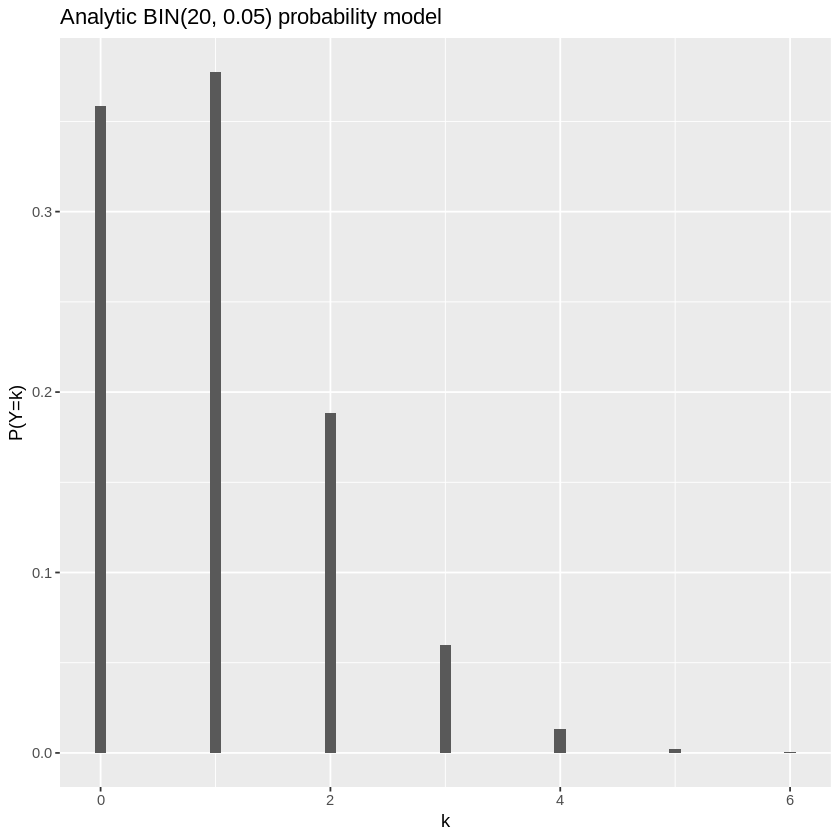

In [17]:
ggplot() +
  geom_bar(aes(x = 0:6, y = dbinom(0:6, 20,.05)), stat = 'identity', width = 0.1)+
    xlab('k') + ylab("P(Y=k)") +
    ggtitle('Analytic BIN(20, 0.05) probability model')

Unlike the bar graphs of simulated outcomes, the probabilities above won't change with different simulations!

#### $P(Y\geq 3)$

Now let's find cumulative probabilities two different ways, approximating it via a simulation and then using the analytic binomial probability model.

In [18]:
# Simulated probability:
sum(many.Y.realizations >= 3)/10000

[1] 0.0765

In [19]:
# Another way:
mean(many.Y.realizations >= 3)

[1] 0.0765

Find $P(Y\geq 3)$ using binomial probabilities:

$$P(Y \geq 3)  = \sum_{k=3}^{20}{20 \choose k} .05^k.95^{20-k}$$

In [44]:
dbinom(3:20, 20, .05)

[1] 5.958215e-02 1.332759e-02 2.244646e-03 2.953482e-04 3.108928e-05
 [6] 2.658952e-06 1.865931e-07 1.080276e-08 5.168784e-10 2.040309e-11
[11] 6.608289e-13 1.739024e-14 3.661102e-16 6.021550e-18 7.457027e-20
[16] 6.541252e-22 3.623962e-24 9.536743e-27

In [20]:
sum(dbinom(3:20, 20, .05))

[1] 0.07548367

In [21]:
1-pbinom(2, 20, .05)

[1] 0.07548367

# Binomial properties

In addition to modeling "likelihood of events," probability models also govern *typical observations* (averages) and *variability.*

If $Y\sim BIN(n,p)$, the parameters $n$ and $p$ govern the mean and variance of $Y$. We use $E(Y)$ to represent the mean of $Y$, and $Var(Y)$ to represent the variance of $Y$:

* $E(Y) = np$
* $Var(Y) = np(1-p)$

In [22]:
library(dplyr)
bin.df <- expand.grid(y = seq(0, 20, by = 1),
                      n = c(10, 20),
                      p = c(.1, .5)) %>%
          mutate(py = dbinom(y, n, p))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




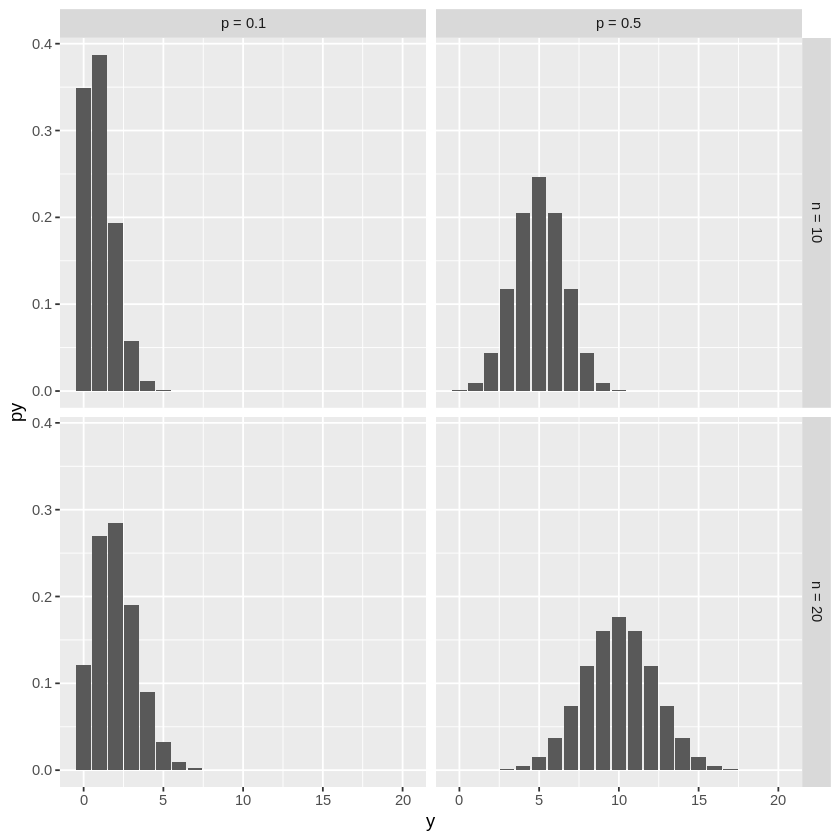

In [23]:
library(ggplot2)
plabs <- c('p = 0.1', 'p = 0.5')
names(plabs) <- c('0.1','0.5')
nlabs <- c('n = 10','n = 20')
names(nlabs) <- c('10','20')
ggplot(data = bin.df) +
  geom_bar(aes(x = y, y = py), stat = 'identity') +
  facet_grid(n~p, labeller = labeller(p = plabs, n =nlabs))


Let's contextualize this.  

Suppose we take repeated samples of $n=20$ children.  Suppose the underlying child bronchitis rate is 5%.

* What would you expect the average number of children with bronchitis, out of 20, to be? I.e., what is $E(Y)$?
  - $20 \times 0.05 = n\times p = 1$
* What is $Var(Y)$?
  - $20 \times 0.05 \times 0.95 = 0.05$

Verifying via simulation:

In [24]:
# Taking 1000 samples of 20 children:
many.samples <- rbinom(1000, 20, 0.05)
head(many.samples)

[1] 0 0 0 1 0 0

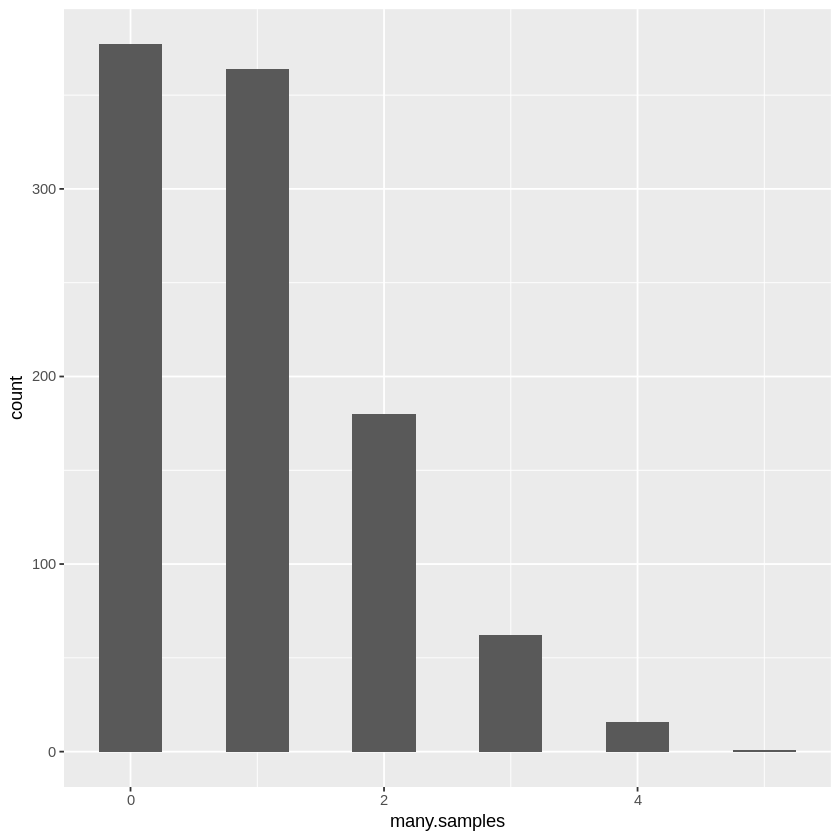

In [25]:
# Plotting a histogram of these samples:
ggplot() +
  geom_histogram(aes(x = many.samples), binwidth = 0.5)

In [26]:
mean(many.samples)

[1] 0.979

In [27]:
var(many.samples)

[1] 0.9655245

* How well do the simulated values approximate the theoretical values?

In [ ]:
# The mean is close to 1, the variance is close to 0.95.

# Using a binary covariate to model a binary $Y$

Of course, with statistical models we want to model a response $Y$ using covariates.  This implies that various parameters of the distribution of $Y$ might change with covariates $X$.  For binomial $Y$, this usually means that $p$ (or some function of $p$) changes with one or more $X$ terms.

Let's consider an example from the [Western Collaborative Group Study (WCGS)](http://www.epi.umn.edu/cvdepi/study-synopsis/western-collaborative-group-study/).

* WCGS was designed to test the hypothesis that the so-called Type A behavior pattern (TABP) – "characterized particularly by excessive drive, aggressiveness, and ambition, frequently in association with a relatively greater preoccupation with competitive activity, vocational deadlines, and similar pressures" – is a cause of coronary heart disease (CHD).
* 3524 men aged 39-59 and employed in the San Francisco Bay or Los Angeles areas were enrolled in 1960 and 1961. In addition to determinations of behavior pattern, the initial examination included medical and parental history, socioeconomic factors, exercise, diet, smoking, alcohol consumption, diet, serum lipid and lipoprotein studies, blood coagulation studies, and cardiovascular examination. Men continuing in the study were re-examined annually in order to obtain an interim cardiovascular history and ECG. Endpoints were a history of classical angina pectoris without apparent myocardial infarction (MI), symptomatic MI, and unrecognized MI. Follow-up for CHD incidence was terminated in 1969.

In [28]:
wcgs <- read.csv('https://www.dropbox.com/s/9n5s1by6e4uoic1/wcgs.csv?dl=1')

The variables of interest are:

* $Y$: whether or not the individual had CHD (variable `chd69`)
* $X$: the behavioral type of the male (Type A or Type B; variable `dibpat`)

In [29]:
library(dplyr)
(wcgs
  %>% select(dibpat, chd69)
  %>% head
)

,dibpat,chd69
,<chr>,<chr>
1,Type A,No
2,Type A,No
3,Type A,No
4,Type A,No
5,Type A,No
6,Type A,No


Consider the following summary table:

In [30]:
(wcgs
  %>% summarize(cnt = n(), .by = c(dibpat, chd69))
  %>% mutate(pct = cnt/sum(cnt), .by = dibpat)
)

dibpat,chd69,cnt,pct
<chr>,<chr>,<int>,<dbl>
Type A,No,1411,0.88797986
Type A,Yes,178,0.11202014
Type B,No,1486,0.94952077
Type B,Yes,79,0.05047923


Let $\hat p_A$ and $\hat p_B$ be the estimated CHD rates for Type A and Type B men, respectively.

* What is $\hat p_A$? **11.2%**
* What is $\hat p_B$? **5.0%**



Define the distribution of $Y$ for each of the following scenarios.

* The CHD status of *one* randomly selected Type-A male
  - $Y_1 | X = Type\ A \sim BIN(1,0.112)$
* The CHD status of *one* randomly selected Type-B male
  - $Y_2 | X = Type\ B \sim BIN(1,0.05)$
* The number of men with CHD out of *15* randomly selected Type-A males
  - $Y_3 | X = Type\ A \sim BIN(15,0.112)$
* The number of men with CHD out of *10* randomly selected Type-B males
  - $Y_4 | X = Type\ B \sim BIN(10,0.05)$

For each of the following questions:

* Define the requested probability using $P(Y= )$ notation;
* Fill in formula of the binomial probability model;
* Use `dbinom()` or `pbinom()` to evaluate the probabilities.  

I have done the first one for you:

## What is the probability that one randomly chosen Type-A male has CHD?


* Asking for $P(Y_1 = 1)$
* We can calculate this using:

$$P(Y_1=1) = {1 \choose 1} (0.11)^1 (1-0.11)^{1-1} = 0.11$$

In [31]:
# Using dbinom to evaluate this probability:

dbinom(1, size = 1, prob = 0.11)

[1] 0.11

## What is the probability that one randomly chosen Type-B male does NOT have CHD?

* Asking for $P(Y_2 = ??)$ where $Y_2 \sim BIN(??, ??)$
* We can calculate this using:

$$P(Y_2=??) = {?? \choose ??} (??)^{??} (1-??)^{??}$$

In [32]:
# Using dbinom to evaluate this probability:



## What is the probability that 3 of 15 randomly chosen Type-A males have CHD?

* Asking for $P(Y_3 = 3)$ where $Y_3 \sim BIN(15, 0.112)$
* We can calculate this using:

$$P(Y_3=??) = {?? \choose ??} (??)^{??} (1-??)^{??}$$

In [33]:
# Using dbinom to evaluate this probability:



## What is the probability that 2 of 10 randomly chosen Type-B males have CHD?

* Asking for $P(Y_4 = 2)$ where $Y_4 \sim BIN(10, 2)$
* We can calculate this using:

$$P(Y_4=2) = {10 \choose 2} (.05)^{2} (1-.05)^{10-2}$$

In [34]:
# Using dbinom to evaluate this probability:



## Which is more likely:

*  4 or more Type-A men with CHD out of 15
  - Asking for $P(Y_3 \geq 4)$
*  3 or more Type-B men with CHD out of 10
  - Asking for $P(Y_4 \geq 3)$

In [46]:
# Use dbinom() and sum() or pbinom() to compare these two probabilities
sum(dbinom(4:15, 15, .112))
1 - pbinom(3, 15, .112)

[1] 0.07830345

[1] 0.07830345

In [47]:
# Use dbinom() and sum() or pbinom() to compare these two probabilities
sum(dbinom(3:10, 10, .05))
1 - pbinom(2, 10, .112)

[1] 0.01150356

[1] 0.09233651

# Using a quantitative covariate to model a binary $Y$

The probability of CHD is likely to depend on a man's systolic blood pressure as well:

In [36]:
(wcgs
  %>% select(sbp, chd69)
  %>% head
)

,sbp,chd69
,<int>,<chr>
1,132,No
2,120,No
3,158,No
4,126,No
5,126,No
6,116,No


In [37]:
(wcgs
  %>% summarize(mean(sbp))
)

mean(sbp)
<dbl>
128.6328


Here, $X = SBP$ is a quantatitive covariate.  How could quantitative covariates be used to model a binary $Y$?  One way is through the following function which we'll motivate more later:

$$P(Y = 1| SBP) = \frac{1}{1+e^{5.93-0.027\cdot SBP}}$$

Questions:

* Note that the mean SBP in the data set is 128.6 mmHg.  What is $\hat p_{SBP=128.6}$, the probability a male with a SBP of 128.6 mmHg has CHD?


In [51]:
# ctr + m + - :to seperate the code chunk
# exp(5) = e^5 in R

1/ (1+ exp(5.93 - 0.027*128.6))

[1] 0.07887002


* Suppose 20 males with a SBP of 128.6 are randomly sampled. Let $W$ represent the number of these males with CHD.  What is the distribution of $W$?
  - $W \sim BIN(20,0.079)$
* What is the probability that 3 or fewer of the 20 males with SBP of 128.6 have CHD?
  - Asking for $P(W <= 3)$

In [52]:
# Finding P(3 or fewer males out of 20 with SBP = 128.6 have CHD):

pbinom(3, 20, .079)

[1] 0.931972